# Results summary

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import sys
import os
from os import path

sys.path.append("./../src")
tmp_path = path.join('.cache', '2022-09-12')
os.makedirs(tmp_path,exist_ok=True)

In [2]:
log_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-10-05/logs'
summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-10-05/summary'

In [3]:
import yaml
import json
from tqdm.notebook import tqdm
from yaml.loader import SafeLoader
import pandas as pd

results = list()
runs = list(os.listdir(log_dir))
runs = [r for r in runs if '.DS_Store' not in r]
runs = [r for r in runs if path.exists(path.join(log_dir , r, 'score.json'))]
runs = [r for r in runs if path.exists(path.join(log_dir , r, 'hparams.yaml'))]

for run in tqdm(runs, total=len(runs)):
    
    with open(path.join(log_dir , run, 'hparams.yaml')) as f:
        hparam = yaml.load(f, Loader=SafeLoader)
    
        with open(path.join(log_dir , run, 'score.json')) as f:
            score = json.load(f)
            score = {k.replace('TEST/', ''): v for k, v in score.items()}
        
    score_row = {**hparam, **score}
    results.append(score_row)

df = pd.DataFrame(results, index=runs)
df.to_parquet(path.join(summary_dir, 'summary.parquet'))
df

0it [00:00, ?it/s]

""


In [84]:
df = pd.read_parquet(path.join(summary_dir, 'summary.parquet'))
df

,data,lambda_entropy,lambda_supervise,n_lstm,a:AUPRC,a:AUROC,a:Dice,a:IoU,a:Jaccard,a:Jaccard2,a:Precision,a:Recall,a:entropy,y:accuracy,y:fscore
run=2_lstm=3_lsup=0.2,hatexplain,0.0,0.2,3,0.579232,0.697754,0.329179,0.445107,0.222130,0.255057,0.753535,0.210798,0.624242,0.669439,0.669439
run=2_lstm=5_lsup=0.4,hatexplain,0.0,0.4,5,0.599185,0.729356,0.236404,0.412653,0.144959,0.149124,0.853843,0.137236,0.242086,0.649168,0.649168
run=0_lstm=3_lsup=0.8,hatexplain,0.0,0.8,3,0.642514,0.757987,0.225122,0.410571,0.130813,0.131781,0.938963,0.127955,0.078098,0.674116,0.674116
run=1_lstm=3_lsup=0.2,hatexplain,0.0,0.2,3,0.587796,0.711271,0.262377,0.421891,0.172694,0.184136,0.828838,0.155988,0.419213,0.668399,0.668399
run=2_lstm=3_lsup=0.9,hatexplain,0.0,0.9,3,0.651203,0.759891,0.230412,0.412514,0.133838,0.135061,0.933710,0.131511,0.096414,0.660083,0.660083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run=1_lstm=3_lsup=0.1,hatexplain,0.0,0.1,3,0.593526,0.711862,0.349705,0.453990,0.241032,0.286244,0.756461,0.227731,0.726385,0.674636,0.674636
run=1_lstm=5_lsup=0.7,hatexplain,0.0,0.7,5,0.561592,0.699173,0.291618,0.429561,0.182015,0.195463,0.745653,0.181433,0.456788,0.662162,0.662162
run=1_lstm=5_lsup=0.2,hatexplain,0.0,0.2,5,0.555509,0.692645,0.363463,0.451343,0.236528,0.276321,0.655609,0.251862,0.675836,0.649168,0.649168
run=0_lstm=3_lsup=0.4,hatexplain,0.0,0.4,3,0.593076,0.713738,0.247832,0.417571,0.157583,0.164382,0.869567,0.144632,0.299985,0.649688,0.649688


In [60]:
# Drop constant columns
df = df.loc[:, (df != df.iloc[0]).any()] 
df

,lambda_supervise,n_lstm,a:AUPRC,a:AUROC,a:Dice,a:IoU,a:Jaccard,a:Jaccard2,a:Precision,a:Recall,a:entropy,y:accuracy,y:fscore
run=2_lstm=3_lsup=0.2,0.2,3,0.579232,0.697754,0.329179,0.445107,0.222130,0.255057,0.753535,0.210798,0.624242,0.669439,0.669439
run=2_lstm=5_lsup=0.4,0.4,5,0.599185,0.729356,0.236404,0.412653,0.144959,0.149124,0.853843,0.137236,0.242086,0.649168,0.649168
run=0_lstm=3_lsup=0.8,0.8,3,0.642514,0.757987,0.225122,0.410571,0.130813,0.131781,0.938963,0.127955,0.078098,0.674116,0.674116
run=1_lstm=3_lsup=0.2,0.2,3,0.587796,0.711271,0.262377,0.421891,0.172694,0.184136,0.828838,0.155988,0.419213,0.668399,0.668399
run=2_lstm=3_lsup=0.9,0.9,3,0.651203,0.759891,0.230412,0.412514,0.133838,0.135061,0.933710,0.131511,0.096414,0.660083,0.660083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
run=1_lstm=3_lsup=0.1,0.1,3,0.593526,0.711862,0.349705,0.453990,0.241032,0.286244,0.756461,0.227731,0.726385,0.674636,0.674636
run=1_lstm=5_lsup=0.7,0.7,5,0.561592,0.699173,0.291618,0.429561,0.182015,0.195463,0.745653,0.181433,0.456788,0.662162,0.662162
run=1_lstm=5_lsup=0.2,0.2,5,0.555509,0.692645,0.363463,0.451343,0.236528,0.276321,0.655609,0.251862,0.675836,0.649168,0.649168
run=0_lstm=3_lsup=0.4,0.4,3,0.593076,0.713738,0.247832,0.417571,0.157583,0.164382,0.869567,0.144632,0.299985,0.649688,0.649688


In [43]:
for n_lstm in df['n_lstm'].unique():
    
    df_lstm = df[df['n_lstm'] == n_lstm]
    
    display(df.groupby('lambda_entropy').mean())
    break

,n_lstm,a:AUPRC,a:AUROC,a:Dice,a:IoU,a:Jaccard,a:Jaccard2,a:Precision,a:Recall,a:entropy,y:accuracy,y:fscore
lambda_entropy,,,,,,,,,,,,
0.1,3.0,0.488753,0.643551,0.168278,0.383915,0.094338,0.094900,0.698964,0.095705,0.046145,0.660545,0.660545
0.2,3.0,0.425438,0.579272,0.122321,0.364699,0.067216,0.067352,0.526703,0.069228,0.014102,0.657542,0.657542
0.3,3.0,0.437231,0.588006,0.144021,0.374037,0.079307,0.079440,0.623096,0.081452,0.013512,0.648880,0.648880
0.4,3.0,0.426077,0.579142,0.128322,0.367620,0.070723,0.070810,0.558310,0.072519,0.008398,0.642296,0.642296
0.5,3.0,0.415493,0.562370,0.140614,0.372618,0.077788,0.077933,0.607349,0.079561,0.015962,0.627859,0.627859
0.6,3.0,0.409616,0.557147,0.125600,0.366575,0.069085,0.069133,0.548113,0.070955,0.004894,0.645588,0.645588
0.7,3.0,0.394914,0.545949,0.116103,0.362116,0.063542,0.063615,0.505866,0.065604,0.006190,0.641141,0.641141
0.8,3.0,0.395861,0.554872,0.119137,0.363242,0.064713,0.064760,0.519880,0.067303,0.005669,0.642816,0.642816
0.9,3.0,0.399563,0.552884,0.130182,0.368418,0.071371,0.071411,0.569197,0.073524,0.003740,0.625433,0.625433


In [63]:
mean = df.groupby(['n_lstm', 'lambda_supervise']).mean()
mean

a:AUPRC   a:AUROC    a:Dice     a:IoU  a:Jaccard  \
n_lstm lambda_supervise                                                      
1      0.0               0.609540  0.726129  0.325467  0.445870   0.239742   
       0.1               0.608284  0.722777  0.301418  0.437391   0.218513   
       0.2               0.615176  0.725444  0.273665  0.428423   0.186377   
       0.3               0.615107  0.723627  0.258516  0.422841   0.168489   
       0.4               0.611121  0.717257  0.249112  0.419340   0.157487   
       0.5               0.609709  0.717832  0.231927  0.412987   0.138474   
       0.6               0.609408  0.716656  0.233477  0.413570   0.141020   
       0.7               0.618654  0.722536  0.230517  0.412643   0.136770   
       0.8               0.618769  0.722550  0.229222  0.412175   0.133941   
       0.9               0.607028  0.714128  0.227359  0.411364   0.132222   
3      0.0               0.473355  0.627771  0.419288  0.423484   0.269210   
       0.1               0.587551  0.707208  0.353672  0.454446   0.240152   
       0.2               0.588357  0.707464  0.317106  0.441662   0.214921   
       0.3               0.608055  0.724093  0.260607  0.422469   0.165155   
       0.4               0.604006  0.724026  0.237130  0.414099   0.144977   
       0.5               0.607715  0.724824  0.234514  0.413294   0.141079   
       0.6               0.626375  0.740749  0.226997  0.410728   0.134273   
       0.7               0.632464  0.747727  0.226398  0.410730   0.132367   
       0.8               0.627417  0.742270  0.230561  0.412196   0.137378   
       0.9               0.645991  0.756684  0.228691  0.411835   0.133851   
5      0.0               0.391274  0.577447  0.375998  0.395399   0.236878   
       0.1               0.504758  0.659402  0.397033  0.438481   0.255971   
       0.2               0.543850  0.682642  0.364427  0.447174   0.238623   
       0.3               0.547241  0.687445  0.338501  0.439363   0.218103   
       0.4               0.560483  0.705249  0.288646  0.426266   0.182709   
       0.5               0.508239  0.676375  0.270545  0.412064   0.174038   
       0.6               0.567076  0.706518  0.260627  0.418020   0.163564   
       0.7               0.572915  0.704758  0.254203  0.417758   0.155746   
       0.8               0.532264  0.689843  0.264819  0.414254   0.166823   
       0.9               0.495013  0.669786  0.219566  0.395186   0.133559   

                         a:Jaccard2  a:Precision  a:Recall  a:entropy  \
n_lstm lambda_supervise                                                 
1      0.0                 0.291157     0.792812  0.205045   0.819077   
       0.1                 0.253248     0.824793  0.184620   0.685014   
       0.2                 0.202348     0.886947  0.161922   0.493455   
       0.3                 0.177787     0.904802  0.150943   0.366020   
       0.4                 0.163576     0.913782  0.144344   0.291341   
       0.5                 0.140602     0.929062  0.132567   0.147698   
       0.6                 0.143819     0.928048  0.133672   0.164932   
       0.7                 0.138439     0.937412  0.131484   0.122729   
       0.8                 0.135192     0.939582  0.130577   0.096567   
       0.9                 0.133297     0.935504  0.129470   0.082182   
3      0.0                 0.350258     0.463878  0.398692   0.939145   
       0.1                 0.287540     0.740378  0.234351   0.728044   
       0.2                 0.247469     0.778199  0.201189   0.598286   
       0.3                 0.175602     0.871212  0.154454   0.331424   
       0.4                 0.148814     0.893601  0.136845   0.207273   
       0.5                 0.143909     0.902204  0.134882   0.182108   
       0.6                 0.135984     0.914932  0.129616   0.127045   
       0.7                 0.133655     0.924946  0.129022   0.107960   
       0.8                 0.139463     0.919605  0.131927   0.127750

In [64]:
std = df.groupby(['n_lstm', 'lambda_supervise']).std()
std

a:AUPRC   a:AUROC    a:Dice     a:IoU  a:Jaccard  \
n_lstm lambda_supervise                                                      
1      0.0               0.003929  0.003567  0.016005  0.006464   0.010540   
       0.1               0.003947  0.005004  0.009007  0.003089   0.005815   
       0.2               0.003282  0.003139  0.010576  0.004357   0.009829   
       0.3               0.013722  0.011208  0.009356  0.003419   0.009726   
       0.4               0.009522  0.007409  0.008096  0.002825   0.009148   
       0.5               0.007370  0.007030  0.002475  0.001123   0.001668   
       0.6               0.009868  0.005808  0.013299  0.004835   0.014314   
       0.7               0.007456  0.007353  0.005646  0.002044   0.006053   
       0.8               0.004176  0.005819  0.002109  0.000852   0.003161   
       0.9               0.006269  0.007130  0.004626  0.001810   0.003883   
3      0.0               0.044991  0.038253  0.036092  0.030107   0.019891   
       0.1               0.005211  0.005971  0.039754  0.014122   0.024101   
       0.2               0.009419  0.008474  0.049803  0.018293   0.039124   
       0.3               0.026351  0.021582  0.037061  0.012259   0.033465   
       0.4               0.011715  0.009610  0.009897  0.003373   0.011135   
       0.5               0.032200  0.027008  0.005360  0.002721   0.004626   
       0.6               0.006799  0.002403  0.005233  0.002353   0.004558   
       0.7               0.008151  0.008118  0.000323  0.000288   0.000343   
       0.8               0.026229  0.023453  0.006774  0.001817   0.008195   
       0.9               0.004639  0.002872  0.001915  0.000625   0.002189   
5      0.0               0.008451  0.007985  0.041054  0.006721   0.026255   
       0.1               0.045975  0.028093  0.037006  0.015179   0.021998   
       0.2               0.014275  0.011617  0.024912  0.005435   0.013379   
       0.3               0.017164  0.013486  0.058257  0.012267   0.039602   
       0.4               0.036710  0.021865  0.053803  0.016456   0.038862   
       0.5               0.039910  0.032138  0.056578  0.016219   0.042667   
       0.6               0.020214  0.014080  0.041771  0.011645   0.032631   
       0.7               0.017803  0.014422  0.032586  0.010245   0.022999   
       0.8               0.062683  0.034272  0.053450  0.019053   0.039815   
       0.9               0.041945  0.034245  0.037039  0.011724   0.020275   

                         a:Jaccard2  a:Precision  a:Recall  a:entropy  \
n_lstm lambda_supervise                                                 
1      0.0                 0.020288     0.011325  0.013187   0.043395   
       0.1                 0.010091     0.013795  0.007504   0.036341   
       0.2                 0.014010     0.009641  0.007355   0.057730   
       0.3                 0.012804     0.016674  0.006680   0.076263   
       0.4                 0.011892     0.014963  0.005838   0.080893   
       0.5                 0.001931     0.006993  0.001507   0.011587   
       0.6                 0.016863     0.015362  0.009075   0.101610   
       0.7                 0.006960     0.007228  0.003823   0.052298   
       0.8                 0.003584     0.010854  0.001376   0.029808   
       0.9                 0.004230     0.000814  0.002987   0.024112   
3      0.0                 0.034478     0.058391  0.097996   0.054947   
       0.1                 0.042783     0.037793  0.038885   0.098266   
       0.2                 0.059900     0.043860  0.041244   0.167609   
       0.3                 0.045792     0.070217  0.028934   0.201607   
       0.4                 0.013676     0.022080  0.007070   0.080292   
       0.5                 0.005348     0.039812  0.003285   0.035832   
       0.6                 0.004903     0.020082  0.003174   0.027703   
       0.7                 0.000503     0.006597  0.000108   0.011199   
       0.8                 0.009751     0.034404  0.005169   0.057725

In [81]:
latex_df = mean.round(4).astype(str) + u"\u00B1" + std.round(4).astype(str)
with open(path.join(summary_dir,'summary.tex'), "w") as f:
    f.write(latex_df.to_latex())

/var/folders/wt/74qzbgts2pjdbwt397c_q5dr00m9p0/T/ipykernel_83626/4229715637.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(latex_df.to_latex())


In [82]:
with open(path.join(summary_dir, 'summary.html'), 'w') as f:
    f.write(latex_df.to_html())

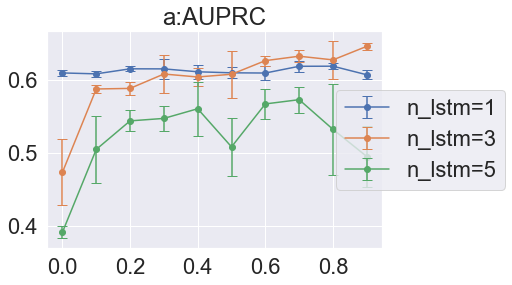

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

groups = mean.index.get_level_values('n_lstm').unique()

for g in groups:

    x = mean.loc[(g,)].index.tolist()
    y_mean = mean.loc[(g,), 'a:AUPRC']
    y_std = std.loc[(g,), 'a:AUPRC']

    ax.errorbar(x, y_mean, yerr=y_std, fmt='-o', capsize=5, label=f'{groups.name}={g}')
    ax.set_title('a:AUPRC')
    
plt.legend(bbox_to_anchor=(1.4,0.5), loc="center right")

# plt.show()
plt.savefig("output.png", bbox_inches="tight")

In [158]:
df_rename = df.copy()
df_rename.columns = df_rename.columns.str.replace('lambda_entropy', '$\\\lambda_{entropy}$')
df_rename.columns = df_rename.columns.str.replace('lambda_supervise', '$\\\lambda_{supervise}$')

In [161]:
df_rename

,data,$\lambda_{entropy}$,$\lambda_{supervise}$,n_lstm,a:AUPRC,a:AUROC,a:Dice,a:IoU,a:Jaccard,a:Jaccard2,a:Precision,a:Recall,a:entropy,y:accuracy,y:fscore
run=0_lstm=3_lentr=0.3,hatexplain,0.3,0.0,3,0.376099,0.555789,0.123338,0.364391,0.066007,0.066055,0.537970,0.069680,7.232288e-03,0.638254,0.638254
run=1_lstm=5_lentr=0.6,hatexplain,0.6,0.0,5,0.316358,0.468703,0.038535,0.328189,0.019649,0.019649,0.169956,0.021740,3.421999e-07,0.640852,0.640852
run=2_lstm=5_lentr=0.8,hatexplain,0.8,0.0,5,0.347180,0.520223,0.109012,0.358118,0.057715,0.057740,0.476921,0.061562,3.522118e-03,0.623701,0.623701
run=2_lstm=3_lentr=0.7,hatexplain,0.7,0.0,3,0.331362,0.497910,0.070957,0.341562,0.036921,0.036949,0.308944,0.040095,5.917442e-03,0.616944,0.616944
run=0_lstm=1_lentr=0.2,hatexplain,0.2,0.0,1,0.603864,0.728187,0.220319,0.408661,0.124680,0.125069,0.936649,0.124897,2.648214e-02,0.667360,0.667360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run=0_lstm=3_lentr=0.8,hatexplain,0.8,0.0,3,0.333400,0.491283,0.080818,0.345835,0.042285,0.042312,0.352619,0.045657,4.802762e-03,0.643971,0.643971
run=0_lstm=5_lentr=0.1,hatexplain,0.1,0.0,5,0.389350,0.578876,0.120246,0.361345,0.065972,0.066491,0.488595,0.068601,5.308630e-02,0.649168,0.649168
run=2_lstm=3_lentr=0.5,hatexplain,0.5,0.0,3,0.432123,0.582887,0.195512,0.397494,0.108617,0.108654,0.857268,0.110381,6.197250e-03,0.622661,0.622661
run=0_lstm=1_lentr=0.1,hatexplain,0.1,0.0,1,0.614453,0.732070,0.224421,0.410318,0.129361,0.130121,0.940280,0.127456,5.283407e-02,0.672557,0.672557


In [48]:
df = df.drop(columns=['data', 'lambda_entropy', 'lambda_lagrange'])

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=2)
for metric in score.keys():
    plt.figure(figsize=(20,15))
    sns.pointplot(data=df, x="lambda_supervise", y=metric, hue='n_lstm', errwidth=2, capsize=0.1, dodge=True, palette='husl')
    
    #plt.show()
    
    #break
    plt.savefig(path.join(summary_dir, f'x=lambda_supervise_y={metric}_color=n_lstm.png'), bbox_inches="tight")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

## Test subfigure

In [14]:
from tqdm.notebook import tqdm
import yaml
import json
import pandas as pd
from yaml import SafeLoader

exp_summary = list()
exp_config = list()
experiments = [e for e in os.listdir(log_dir) if '.DS_Store' not in e]
for experiment in experiments:
    experiment_path = path.join(log_dir, experiment)
    out_path = path.join(log_dir, 'summary', experiment)
    parquet_path = path.join(out_path, 'summary.parquet')
    config_path = path.join(out_path, 'config.json')
    
    results = list()
    runs = list(os.listdir(experiment_path))
    runs = [r for r in runs if '.DS_Store' not in r]
    runs = [r for r in runs if path.exists(path.join(experiment_path, r, 'hparams.yaml')) and path.exists(path.join(experiment_path, r, 'score.json'))] # get runs that has hparams and score
    
    if len(runs) == 0:
        log.warn(f'Skip {experiment}: No run found')
        continue
    
    if not path.exists(parquet_path):
        
        for run in tqdm(runs, total=len(runs), desc=f'Summarize {experiment}', file=sys.stdout):
            with open(path.join(experiment_path, run, 'hparams.yaml')) as f:
                hparam = yaml.load(f, Loader=SafeLoader)

            with open(path.join(experiment_path, run, 'score.json')) as f:
                score = json.load(f)
                score = {k.replace('TEST/', ''): v for k, v in score.items()}

            score_row = {**hparam, **score}
            results.append(score_row)

        summary = pd.DataFrame(results, index=runs)
        config = {
            'hparams': list(hparam.keys()),
            'metrics': list(score.keys())
        }
        
        # Save to summary
        ## Cache dataframe
        os.makedirs(out_path)
        summary.to_parquet(parquet_path)
        with open(config_path, "w") as f:
            json.dump(config, f)

    else:
        summary = pd.read_parquet(parquet_path)
        with open(config_path, 'r') as f:
            config = json.read(f)
    exp_summary.append(summary)
    exp_config.append(config)         


Summarize lstm_attention_yelp50_supervise:   0%|          | 0/73 [00:00<?, ?it/s]

Summarize lstm_attention_hatexplain_supervise:   0%|          | 0/60 [00:00<?, ?it/s]

In [18]:
from functools import reduce
def common_element(*list_):
    # Get common elemnent from list of list
    return list(reduce(lambda i, j: i & j, (set(x) for x in list_)))

hparams_names = [c['hparams'] for c in exp_config]
metrics_names = [c['metrics'] for c in exp_config]
hparam = common_element(*hparams_names)
metrics = common_element(*metrics_names)

In [24]:
m = metrics[0]
all_y_min = [summary[m].min() for summary in exp_summary]
all_y_max = [summary[m].max() for summary in exp_summary]
y_min = min(all_y_min)
y_max = max(all_y_max)
y_lim = (y_min, y_max)

In [23]:
y_lim

(0.2159857153892517, 0.5499416589736938)

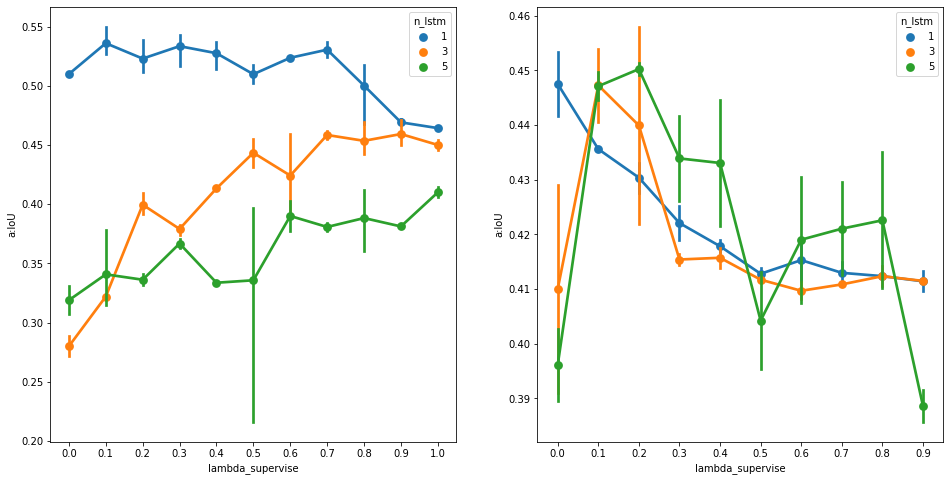

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

#objectives = [p for p in config['hparams'] if 'lambda' in p and df[p].nunique() > 1] # ["lambda_entropy", "lambda_supervise"]
#groups = [p for p in config['hparams'] if 'lambda' not in p and df[p].nunique() > 1] # ["n_lstm", "n_attention", "n_cnn"]

fig, axes = plt.subplots((len(exp_summary)//2 + len(exp_summary)%2), 2, figsize=(16, 8))

for axe, summary in zip(axes, exp_summary):
    objectives = [p for p in config['hparams'] if 'lambda' in p and summary[p].nunique() > 1]
    groups = [p for p in config['hparams'] if 'lambda' not in p and summary[p].nunique() > 1]
    x = objectives[0]
    sns.pointplot(ax=axe, data=summary, x=x, y=m, hue=groups[0])

In [39]:
exp_summary

[                            data  lambda_entropy  lambda_supervise  n_lstm  \
 run=2_lstm=5_lsup=0.7  yelphat50             0.0               0.7       5   
 run=2_lstm=5_lsup=0.0  yelphat50             0.0               0.0       5   
 run=0_lstm=1_lsup=0.6  yelphat50             0.0               0.6       1   
 run=0_lstm=5_lsup=1.0  yelphat50             0.0               1.0       5   
 run=0_lstm=1_lsup=0.1  yelphat50             0.0               0.1       1   
 ...                          ...             ...               ...     ...   
 run=1_lstm=1_lsup=0.5  yelphat50             0.0               0.5       1   
 run=2_lstm=3_lsup=0.3  yelphat50             0.0               0.3       3   
 run=1_lstm=1_lsup=0.4  yelphat50             0.0               0.4       1   
 run=1_lstm=1_lsup=0.3  yelphat50             0.0               0.3       1   
 run=2_lstm=3_lsup=0.2  yelphat50             0.0               0.2       3   
 
                         a:AUPRC   a:AUROC    a:Di

In [27]:
(len(exp_summary)//2 + len(exp_summary)%2)

1

In [25]:
exp_config

[{'hparams': ['data', 'lambda_entropy', 'lambda_supervise', 'n_lstm'],
  'metrics': ['a:AUPRC',
   'a:AUROC',
   'a:Dice',
   'a:IoU',
   'a:Jaccard',
   'a:Jaccard2',
   'a:Precision',
   'a:Recall',
   'a:entropy',
   'y:accuracy',
   'y:fscore']},
 {'hparams': ['data', 'lambda_entropy', 'lambda_supervise', 'n_lstm'],
  'metrics': ['a:AUPRC',
   'a:AUROC',
   'a:Dice',
   'a:IoU',
   'a:Jaccard',
   'a:Jaccard2',
   'a:Precision',
   'a:Recall',
   'a:entropy',
   'y:accuracy',
   'y:fscore']}]

In [3]:
from modules.utils import hightlight

ModuleNotFoundError: No module named 'modules'